# Assignment 1 - Decision Trees and Clustering Techniques

## *Aprendizagem Computacional - MEI | Computação Neuronal e Sistemas Difusos - MIEB*

### by Catarina Silva and Marco Simões

_

This assignment will assess the students knowledge on the following Machine Learning topics:
- Decision Trees
- Clustering Techniques

The assignment is split into two sub-assignments: 1-a) Decision Trees (first week) and 1-b) Clustering Techniques (second week).

Students should implement their solutions and answering the questions directly in the notebooks, and submit both files together in Inforestudante before the deadline: *06/10/2021*

## Conditions: 
- *Groups:* two elements of the same PL class
- *Duration:* 2 weeks
- *Workload:* 8h per student
 


# Assignment 1 - a) Decision Trees

Consider the depression dataset, from Agresti, A. (2019). _An introduction to categorical data analysis (2nd ed.). John Wiley & Sons._ This dataset is composed by evaluations of 335 patients during 3 phase treatment. We want to learn a decision tree that, given the attributes A - Diagnosis Severity (0: Mild, 1: Severe), B - Treatment Type (0: Standard, 1: New drug) and C - Follow Up Time (0: 1 week, 1: 2 weeks, 2: 4 weeks), predicts D - Depression Outcome (0: Normal, 1: Abnormal).




In [1]:
import pandas as pd
import numpy as np
... # TODO add extra imports if needed


# load data
data = pd.read_csv('depression.csv')


***
### Ex. 1
Create a function `attr_probs( data, attr )` that, given the dataset (`data`) and a attribute id (`attr`), computes the percentage of cases with Abnormal treatment outcome (D) for each attribute *value*. The function should return a dictionary with the different attribute values as keys and the correspondent percentages as values. Example: `attr_probs( data, 'A')` -> returns `{0: 0.30, 1: 0.23}`

In [2]:
OUTCOME = 'D'

def attr_probs( data, attr):

    probs = {}
    unique_values = data[attr].unique()
    
    for val in unique_values:
        selection = data.loc[data[attr] == int(val)]
        probs[val] = round(selection[OUTCOME].sum() / selection.shape[0],2)

    return probs

In [3]:
attr_probs( data, 'A')

{0: 0.67, 1: 0.41}

***
### Ex. 2
Create a function `entropy( probs )` that, given a list probability values, returns the correspondent **entropy** value.

In [4]:
def entropy( probs ):
    entropy = 0
    for i in probs:
        if(i!=0):
            entropy+= -i*np.log2(i)
    return entropy

In [5]:
# example
print(entropy([2/8, 0/8, 4/8, 2/8])) # should print 1.5

1.5


***
### Ex. 3 
Create a function `gain( data, attr )` to compute the gain of an attribute. Make use of the functions developed in the previous exercises.

In [6]:
def gain( data, attr ):
    
    number_of_elements = data.shape[0]
    
    # Gain(S,a) = Entropy(S) - |S_a0|/|S|*Entropy(S_a0) - |S_a1|/|S|*Entropy(S_a1) - .... - |S_an|/|S|*Entropy(S_an)
    # where S_a0 = column "a" value 0, S_a1 = column "a" value 1 and so on...
    
    # |S_an|/|S|
    def proportion_of_attr_rows(data,attr,val):
        selection = data.loc[data[attr] == int(val)].shape[0]
        return selection / number_of_elements
    
    #Entropy of the whole dataset, where target variable is in column "D"
    def entropy_S(data):
        number_of_vals = (data.groupby('D').count()).iloc[:, 0]
        return entropy([row[1] / number_of_elements for row in number_of_vals.iteritems()])

    probs = attr_probs(data, attr)
    
    #Entropy(S)
    result = entropy_S(data)
    
    # - |S_a0|/|S|*Entropy(S_a0) - |S_a1|/|S|*Entropy(S_a1) - .... - |S_an|/|S|*Entropy(S_an)
    for (k,v) in probs.items(): 
        result -= proportion_of_attr_rows(data,attr,k) * entropy([v, round(1-v,2)])
    return result

In [7]:
attr = 'A'
print(gain(data, attr))

0.04919697538083989


***
### Ex. 4 

Run the following code to compute the gain for the different attributes. In what does those results influence the design of the decision tree?

In [8]:
ATTRS = ['A', 'B', 'C']
for attr in ATTRS:
    print('Gain {attr}: {gain:.2f}'.format(attr=attr, gain=gain(data, attr)))

Gain A: 0.05
Gain B: 0.02
Gain C: 0.07



**Answer:**

`Those results influence the design of the decision tree in fact the attribute with the biggest gain will be at the root of the tree. In this case attribute 'C' will be at the root of the decision tree.`

***
### Ex. 5

Split the dataset into two sets (train set and test set), assigning randomly $70\%$ of the cases to the train set and the remaining $30\%$ to the test set. Use the `train_test_split` method from the `sklearn.model_selection` module, specifying the `random_state` with a value of $7$ for reproducibility purposes.

Train a `DecisionTreeClassifier` (from the `sklearn.tree` module) using the training data. Enforce the use of the `entropy` criterion instead of the `gini` criterion. 

Resort to the function `export_text` from the `sklearn.tree` module to visualize the structure of the resulting tree. Are the results of **Ex. 4** congruent with the tree obtained here? Justify.



In [9]:
from sklearn.model_selection import train_test_split

y = data.D
data.drop(['D'], axis=1, inplace=True)

X_train, X_test, y_train, y_test = train_test_split(data, y, train_size=0.7, test_size=0.3, random_state=7)

In [10]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(criterion='entropy')
model.fit(X=X_train,y=y_train)


DecisionTreeClassifier(criterion='entropy')

In [11]:
from sklearn.tree import export_text

tree_text = export_text(model, feature_names=list(X_train.columns))
print(tree_text)

|--- C <= 1.50
|   |--- A <= 0.50
|   |   |--- B <= 0.50
|   |   |   |--- C <= 0.50
|   |   |   |   |--- class: 1
|   |   |   |--- C >  0.50
|   |   |   |   |--- class: 1
|   |   |--- B >  0.50
|   |   |   |--- C <= 0.50
|   |   |   |   |--- class: 1
|   |   |   |--- C >  0.50
|   |   |   |   |--- class: 1
|   |--- A >  0.50
|   |   |--- C <= 0.50
|   |   |   |--- B <= 0.50
|   |   |   |   |--- class: 0
|   |   |   |--- B >  0.50
|   |   |   |   |--- class: 0
|   |   |--- C >  0.50
|   |   |   |--- B <= 0.50
|   |   |   |   |--- class: 0
|   |   |   |--- B >  0.50
|   |   |   |   |--- class: 1
|--- C >  1.50
|   |--- B <= 0.50
|   |   |--- A <= 0.50
|   |   |   |--- class: 1
|   |   |--- A >  0.50
|   |   |   |--- class: 0
|   |--- B >  0.50
|   |   |--- A <= 0.50
|   |   |   |--- class: 1
|   |   |--- A >  0.50
|   |   |   |--- class: 1




**Answer:**

`The result are congruent with the tree obtained because the attribute 'C' is the root of our decision tree.`

***
### Ex 6

Looking for the structure of the tree printed, evaluate the following cases (by hand) and provide the outcome class for each case, as well as the path from the root to the leaf (meaning, provide the conditions it evaluated as true to reach that class).

**Cases:**<p>
c1 = (A=1, B=0, C=2)<p>
c2 = (A=0, B=0, C=0)<p>
c3 = (A=0, B=0, C=1)<p>
c4 = (A=1, B=1, C=0)<p>


**Example:**<p>
case: cx = (A=1, B=1, C=1)<p>
path: (C <= 1.5) --> (A > 0.5) --> (C > 0.5) --> (B > 0.5) --> class 1<p>


**Answer:**

case: c1 = (A=1, B=0, C=2)<p>
path: `(C>1.5)-->(B<0.5)-->(A>0.5)-->class 0`<p>
_

case: c2 = (A=0, B=0, C=0)<p>
path: `(C<=1.5)-->(A<=05)-->(B<=0.5)-->(C<=0.5)-->class 1`<p>
_

case: c3 = (A=0, B=0, C=1)<p>
path: `(C<=1.5)-->(A<=0.5)-->(B<=0.5)--(C>0.5)-->class 1`<p>
_

case: c4 = (A=1, B=1, C=0)<p>
path: `(C<=1.5)-->(A>0.5)-->(C<=0.5)-->(B>0.5)-->class 1`<p>



***
### Ex. 7

Apply the decision tree trained in the previous exercise to the test data. Compare the predicted labels to the true labels, generating a confusion matrix (you can use the `confusion_matrix` function of the `sklearn.metrics` module for that). Report the **percentage** of `True Positives, True Negatives, False Positives and False Negatives`, as well as the metrics `accuracy, precision, recall and f1-score`.


In [12]:
y_pred = model.predict(X_test)

In [13]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)

print(conf_matrix)

print('True Positives:',conf_matrix[0][0])
print('False Negatives:',conf_matrix[0][1])
print('False Positives:',conf_matrix[1][0])
print('True Negatives:',conf_matrix[1][1])

[[ 95  59]
 [ 37 115]]
True Positives: 95
False Negatives: 59
False Positives: 37
True Negatives: 115


In [14]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.72      0.62      0.66       154
           1       0.66      0.76      0.71       152

    accuracy                           0.69       306
   macro avg       0.69      0.69      0.68       306
weighted avg       0.69      0.69      0.68       306



***
### Ex. 8
Repeat the process of spliting the data, training the classifier and testing the classifier 100 times (use the values from 0 to 99 as `random_state` for the `train_test_split`function). Plot the accuracy across the 100 repetitions, reporting also its mean value and standard deviation.


In [15]:
import matplotlib.pyplot as plt

In [16]:
def calc_accuracy(conf_matrix):
    return (conf_matrix[0][0] + conf_matrix[1][1]) / conf_matrix.sum()

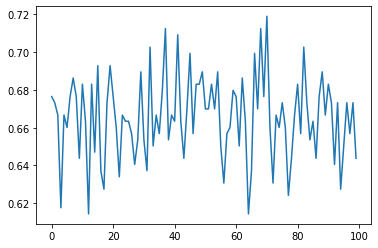

In [17]:
data = pd.read_csv('depression.csv')

y = data.D
data.drop(['D'], axis=1, inplace=True)

random_states = [i for i in range(100)]
accuracies = []
for i in random_states:
    X_train, X_test, y_train, y_test = train_test_split(data, y, train_size=0.7, test_size=0.3, random_state=i)
    model = DecisionTreeClassifier(criterion='entropy')
    model.fit(X=X_train,y=y_train)
    y_pred = model.predict(X_test)
    conf_matrix = confusion_matrix(y_test, y_pred)
    accuracies.append(calc_accuracy(conf_matrix))

plt.plot(random_states,accuracies)

In [18]:
print('Mean:',np.mean(accuracies))

Mean: 0.6655882352941177


In [19]:
print('Standard Deviation:',np.std(accuracies))

Standard Deviation: 0.02164797742833218
